In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,jlcs2,English,personality,Counter-Strike,Just Chatting,4.0,248.000,1.423,1.3,1.873,133000,766000,31,1.8,Monday,Saturday
995,997,nobru_xy,Portuguese,personality,Virtual Casino,NaN,10.4,874.000,0.000,1.0,21.000,1300,0,1,0.8,Friday,Friday
996,998,buxexa_t,Portuguese,personality,Virtual Casino,Slots,9.6,216.000,0.000,1.0,19.000,1300,0,2,0.4,Thursday,Thursday
997,999,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,5.1,605.000,16.190,1.1,6.827,837000,22400000,24,3.6,Tuesday,Monday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    float64
 8   AVG_VIEWERS_PER_STREAM          999 non-null    float64
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    float64
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

In [6]:
df['LANGUAGE'].unique()

array(['English', 'Spanish', 'French', 'German', 'Russian', 'Japanese',
       'Chinese', 'Portuguese', 'Italian', 'Polish', 'Turkish',
       'Ukrainian', 'Korean', 'Thai', 'Hungarian', 'Czech', 'Cantonese',
       'Romanian', 'Arabic'], dtype=object)

In [19]:
lenguajes = df['LANGUAGE'].str.split(', ').explode()
contar_lenguajes = Counter(lenguajes)
top_lenguajes = contar_lenguajes.most_common(10)
df_top_lenguajes = pd.DataFrame(top_lenguajes, columns = ['LANGUAGE', 'COUNT'])

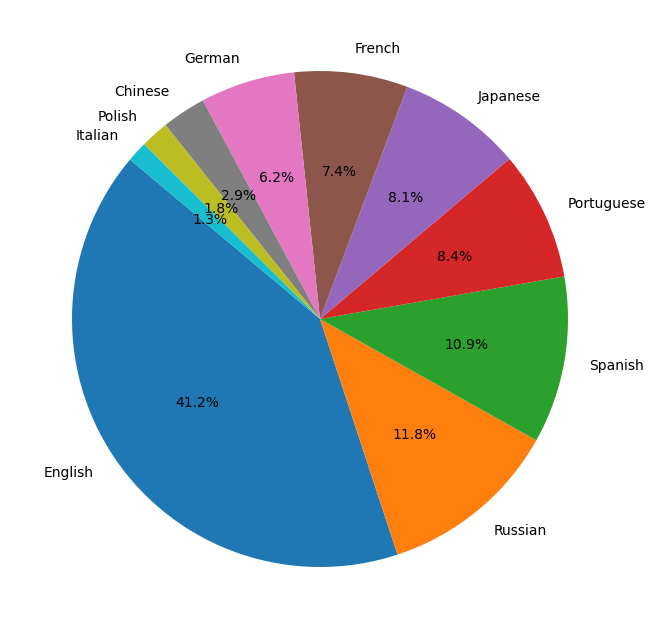

In [24]:
plt.figure(figsize=(8,10))
plt.pie(df_top_lenguajes['COUNT'], labels=df_top_lenguajes['LANGUAGE'], autopct = '%1.1f%%', startangle=140)
plt.show()

Conclusion > Normalmente, los streamers de habla inglesa son los mas comunes en Twitch

In [42]:
df_lenguaje_por_rango = df.groupby('LANGUAGE')['RANK'].mean().sort_values(ascending=False).reset_index()
df_lenguaje_por_rango

,LANGUAGE,RANK
0,Cantonese,793.500000
1,Arabic,768.000000
2,Romanian,756.000000
3,Czech,744.333333
4,Chinese,581.928571
5,Thai,549.200000
6,Hungarian,545.000000
7,Portuguese,540.756098
8,Russian,520.965217
9,Italian,501.461538


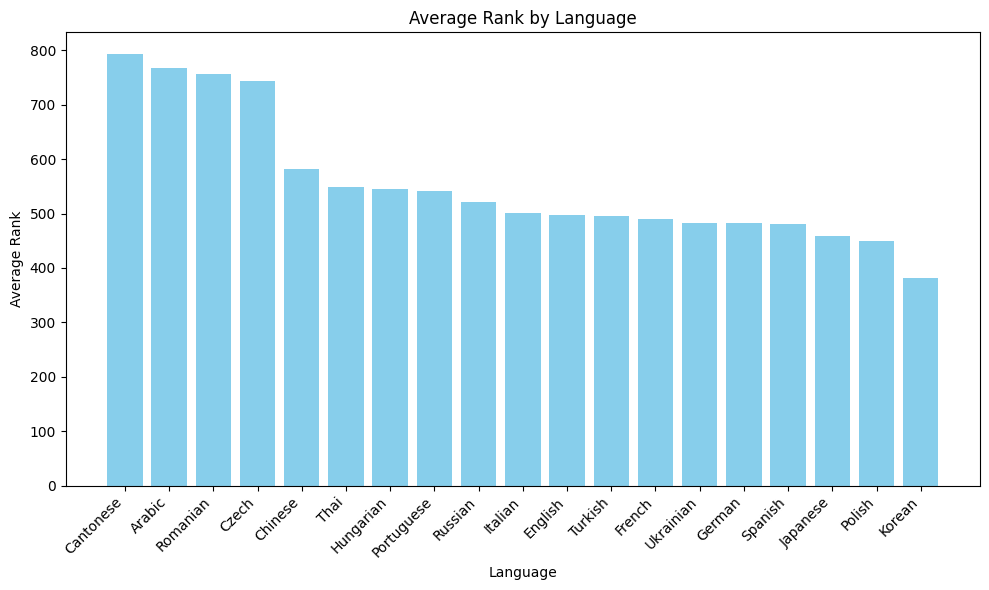

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(df_lenguaje_por_rango['LANGUAGE'], df_lenguaje_por_rango['RANK'], color='skyblue')
plt.xlabel('Language')
plt.ylabel('Average Rank')
plt.title('Average Rank by Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
lang_count=df["LANGUAGE"].value_counts().sort_values(ascending=False).head(5)
lang_count

LANGUAGE
English       401
Russian       115
Spanish       106
Portuguese     82
Japanese       79
Name: count, dtype: int64

<BarContainer object of 5 artists>

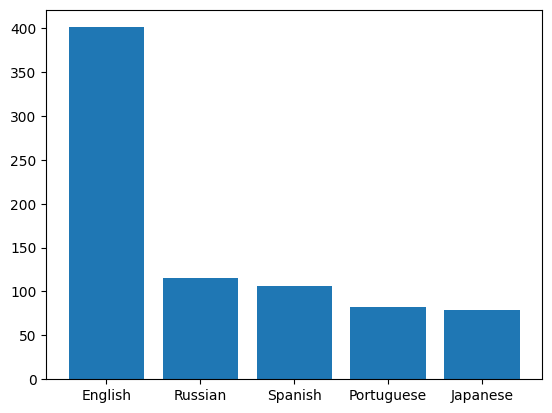

In [53]:
plt.bar(lang_count.index, lang_count.values)

In [54]:
df

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,jlcs2,English,personality,Counter-Strike,Just Chatting,4.0,248.000,1.423,1.3,1.873,133000,766000,31,1.8,Monday,Saturday
995,997,nobru_xy,Portuguese,personality,Virtual Casino,NaN,10.4,874.000,0.000,1.0,21.000,1300,0,1,0.8,Friday,Friday
996,998,buxexa_t,Portuguese,personality,Virtual Casino,Slots,9.6,216.000,0.000,1.0,19.000,1300,0,2,0.4,Thursday,Thursday
997,999,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,5.1,605.000,16.190,1.1,6.827,837000,22400000,24,3.6,Tuesday,Monday


### Streamer mas visto

In [77]:
streamer_mas_visto = df[df['RANK'] <= 5]
streamer_mas_visto

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday


### Los 5 streamers de habla hispana en el ranking mundial

In [87]:
streamer_mas_visto_spanish = df[(df['RANK']) & (df['LANGUAGE'] == 'Spanish')].head(5)
streamer_mas_visto_spanish

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday
14,15,illojuan,Spanish,personality,Just Chatting,Minecraft,4.5,2.993,52.631,1.7,7.382,4090000,72000000,368,4.5,Thursday,Sunday
37,39,mixwell,Spanish,personality,VALORANT,Counter-Strike,4.8,1.124,27.368,1.1,4.432,1090000,26400000,42,2.3,Sunday,Sunday
41,43,desst3,Spanish,personality,Grand Theft Auto V,Minecraft,5.6,464.000,10.358,1.3,7.586,574000,12800000,44,5.1,Friday,Tuesday
59,61,nexxuz,Spanish,personality,Grand Theft Auto V,World of Warcraft,4.5,6.163,11.542,1.5,248.000,335000,759000,11,0.2,Tuesday,Sunday


In [88]:
streamer_mas_visto_spanish['AVERAGE_STREAM_DURATION'].mean()

4.7

Conclusion > En promedio los streamers de habla hispana, realizan sus streams con una duracion media de 4.7 Horas

### Los 5 streamers de habla inglesa en el ranking mundial

In [86]:
streamer_mas_visto_ingles = df[(df['RANK']) & (df['LANGUAGE'] == 'English')].head(5)
streamer_mas_visto_ingles

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
8,9,riotgames,English,esports,League of Legends,League of Legends: Wild Rift,8.5,3.434,346.968,1.0,9.459,6860000,1339000,8,2.8,Saturday,Sunday
20,21,xqc,English,personality,Overwatch,Just Chatting,8.8,5.132,224.584,3.3,21.756,12000000,525000000,967,6.3,Wednesday,Thursday
26,27,lord_kebun,English,personality,Grand Theft Auto V,Call of Duty: Warzone,6.8,478.000,25.866,1.2,9.860,655000,35400000,66,4.1,Friday,Monday


In [89]:
streamer_mas_visto_ingles['AVERAGE_STREAM_DURATION'].mean()

7.6

Conclusion > En promedio los streamers de habla inglesa, realizan sus streams con una duracion media de 7.6 Horas

### Juego mas stremeado

In [59]:
top10_games = df['MOST_STREAMED_GAME'].value_counts().head(10)
top10_games

MOST_STREAMED_GAME
Just Chatting         257
League of Legends      84
Grand Theft Auto V     74
VALORANT               60
Casino                 36
Fortnite               35
Dota 2                 35
Counter-Strike         31
Minecraft              24
Virtual Casino         23
Name: count, dtype: int64

Conclusion > El tipo de stream mas realizado son los de Just Chatting (solo charla)

In [67]:
df_top10_games = df[df['MOST_STREAMED_GAME'].isin(top10_games.index)]
df_top10_games

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday
5,6,auronplay,Spanish,personality,Minecraft,Just Chatting,3.7,13.260,213.849,1.8,4.482,16300000,263000000,169,5.0,Wednesday,Sunday
7,8,tarik,English,personality,VALORANT,Counter-Strike,7.6,2.013,60.430,1.3,10.995,3110000,93300000,78,3.7,Thursday,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,995,nacho_dayo,Japanese,personality,VALORANT,Just Chatting,5.1,629.000,2.492,1.4,3.001,396000,1570000,142,1.9,Saturday,Sunday
994,996,jlcs2,English,personality,Counter-Strike,Just Chatting,4.0,248.000,1.423,1.3,1.873,133000,766000,31,1.8,Monday,Saturday
995,997,nobru_xy,Portuguese,personality,Virtual Casino,NaN,10.4,874.000,0.000,1.0,21.000,1300,0,1,0.8,Friday,Friday
996,998,buxexa_t,Portuguese,personality,Virtual Casino,Slots,9.6,216.000,0.000,1.0,19.000,1300,0,2,0.4,Thursday,Thursday


### Promedio de viewers por juego

In [71]:
avg_viewers_per_game = df_top10_games.groupby('MOST_STREAMED_GAME')['AVG_VIEWERS_PER_STREAM'].agg('mean').sort_values(ascending=False)
avg_viewers_per_game

MOST_STREAMED_GAME
Counter-Strike        122.734677
VALORANT              122.543683
League of Legends      73.913464
Grand Theft Auto V     70.014973
Just Chatting          62.428047
Fortnite               45.594400
Dota 2                 33.622914
Minecraft              27.612125
Virtual Casino          5.130435
Casino                  0.000000
Name: AVG_VIEWERS_PER_STREAM, dtype: float64

Text(0, 0.5, 'Average viewership')

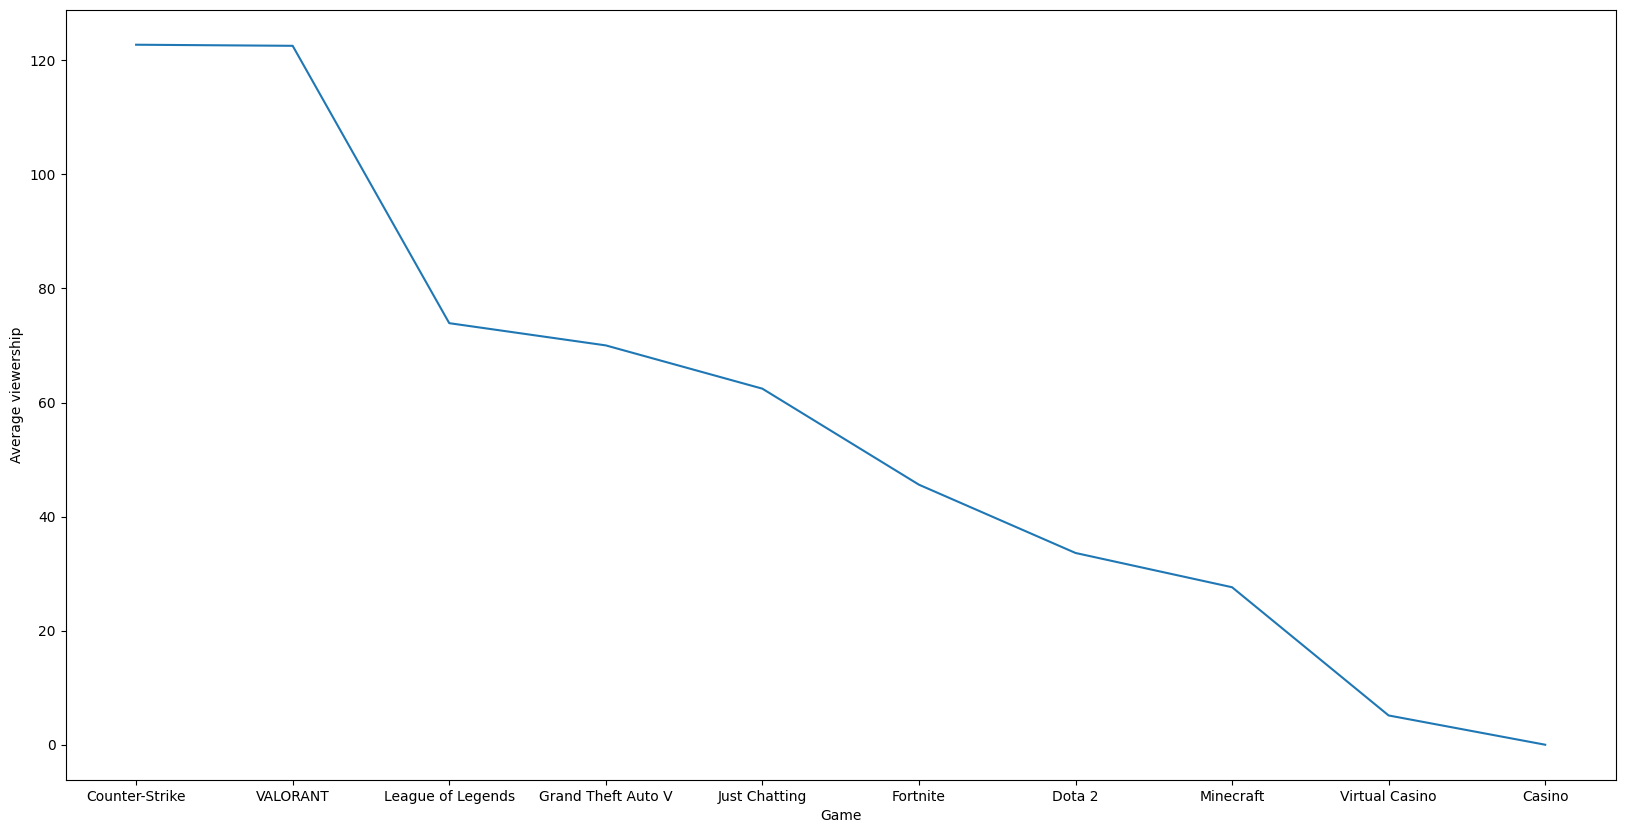

In [72]:
plt.figure(figsize=(20,10)) 
plt.plot(avg_viewers_per_game.sort_values(ascending=False))
plt.xlabel("Game")
plt.ylabel("Average viewership")